# Classifiers and Regression

## Introduction: Difference between classification and regression

Regression: main ideas
Regression predictive modelling
    
    Regression predictive modelling is the task of approximating a mapping function (f) from input explanatory variables (X) to a continuous output variable (y)
    
    Example: we have a test bench with the price and the size of different houses. Knowning the size of a new ouse, we want to know the corresponding price.
    
    - A regression problem requiers the prediction of a quantity
    - Such a problem can have multiple input variables (multivariate)
    - The skill of the model corresponds to the error in those predictions

Example of scalar linear regresssion
- Real system y = f(x), f unknown,
- Set of n measurements $ y_i = f(x_i) $
- Minimize the error between the estimation and the real value
- Go from $y = f(x)$ to the to $y=ax$
        
Objective:
    Find a scalar a such that the approximation y=ax is the best linear approximation of the real model in the sense of $||\centerdot ||_2 -$ norm
    
- For a given a our estimator gives us the following estimations $y_i = ax_i$
- We want to find a that minimizes

$$ \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \sum_{i=1}^n (ax_i - y_i)^2 $$

- Classification is the task of predicting a discrete class label.
- Regression is the task of predicting a continuous quantity

- Some algorithms can be used for both classification and regression with small modifications
- Classification predictions can be evaluated using accuracy, whereas regression can be evaluated using error.

## Description of the Nearest Neighbour (NN) Algorithm
- Instance based learning: does not construct a model
- Classification is computed from a vote majority
- For each new point, we consider the k nearest neighbours and choose the majority class
- Simple algorith, successfully used in a large numer of problems
- What does near mean?
- Algorithm depends on k, what is a good choices of k?

### Choise of the weights
- Euclidian metrics
    - Uniform weights
        - The value assigned to a query point is computed for a simple majority vote of the nerest neightours. Each neighbour has the same weight
        - Drawback occurs when the class distribution is skewed (domination of a class)
    - Distance weights
        - We assign weights proportional to the inverse of the distance from the query point. Nearer neighbours contribute more to the fit.
        - Not uniformly sample data: only consider data points within a certain radius

### How do we choose k?

- The optimal choice of k is highly data-dependent.
- Alarger k suppresses the effects of noise but it makes the classification boundaries less distinct.

- Cross-validation method
    - We partition our original data set into two subsets: the training set and the validation set.
    - The training set is used to define the considered neighbours
    - We choose a value of k, we apply the algorithm on the validation set
    - We compute the number of misclassified points
    - We repeat, changing the value of k. We choose the optimal value of k.
    
- to reduce variability , multiple rounds of cross-validation are performed using different partitions. The results are averaged

### Some words about the NN regression
- Data labels are continuous and not discrete.
- The label assigned to a query point is computed based on the mean of the labels of its nearest neighbours.

### Implementaton
- Different algorithms
- Depends on the number of samples, query points, data structure.

#### Introduction Exercise

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
from sklearn import datasets, linear_model, neighbors 
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.neighbors import NearestNeighbors
import time

In [2]:
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

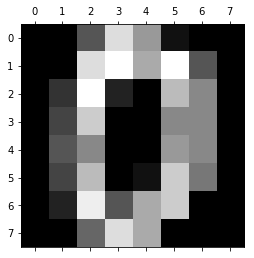

In [4]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [8]:
iris = datasets.load_iris()

print('iris target_names')
print(iris.target_names)

print('iris feature_names')
print(iris.feature_names)

print('iris target[10]')
print(iris.target[10])

print('iris data[10]')
print(iris.data[10])

iris target_names
['setosa' 'versicolor' 'virginica']
iris feature_names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris target[10]
0
iris data[10]
[5.4 3.7 1.5 0.2]


## Exercise 1: Nearest Neighbours on a Temperature Problem

The purpose of this exercise is to learn how to use the Nearest Neighbours algorithm on a toy problem. 
We consider a data set that corresponds to the mean temperatures (in °C) and the total precipitations (in mm) for different days of May 2018 and May 2019 in Calgary.


1) Using the command np.array, create the data array X_data and the target array X_target that correspond to the given data set. The data array should have 2 columns (one for the temperature, and one for the precipitations) and 20 lines. The components of the target array X_target should be either 0 (May 2018) or 1 (May 2019). The target array should have 20 lines.

In [10]:
temp_array = np.array([9.4, 9.9, 13.1, 14.5, 13.6, 12.8, 16.7, 17.7, 9.4, 6.3,
                       2.3, 5.2, 4.1, -1.4, -0.3, 4.4, 5.8, 7.3, 9.6, 13.2])
precip_array = np.array([0.4, 0, 0, 0, 0, 0, 0.4, 1, 1.7, 2.6,
                         0, 4.6, 0, 5.5, 1.4, 0, 6, 2.2, 0.3, 0.6])
X_data = np.vstack((temp_array, precip_array)).T
X_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).T

temp_2018 = temp_array[0:9].T
temp_2019 = temp_array[10:].T
precip_2018 = precip_array[0:9].T
precip_2019 = precip_array[10:].T

x_min = min(temp_array)
x_max = max(temp_array)

2) Create the 10x1 arrays temp_2018; temp_2019, precip_2018 and precip_2019 that respectively correspond to the temperature for the 10 considered days of 2018, of 2019 and for the precipitations in 2018 and 201

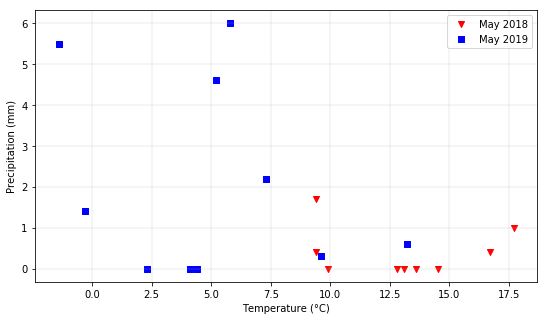

In [11]:
plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
plt.scatter(temp_2018,precip_2018,color='red',marker='v', label='May 2018')
plt.scatter(temp_2019,precip_2019,color='blue',marker='s', label='May 2019')
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("")
plt.legend(loc='upper right')
plt.show()

3) We consider a day for which the temperature was of 15°C and for which the precipitations were of 3mm. Just by graphic reading, do you think this day belongs to 2019 or 2018?

What about a second day for which the temperature was of 6.5°C and the precipitations were of 1mm?

To solve the classification problem, we want to plot the decision boundaries for each class. 

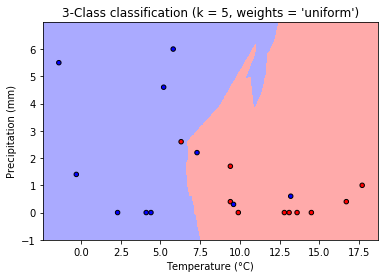

(array([[1.44222051, 1.61245155, 2.32594067, 2.6       , 2.96141858]]),
 array([[17,  9, 15, 12,  0]]))

In [12]:
n_neighbors = 5 # Nb of neighbours
h = 0.02  # step size in the mesh

temp=X_data[0:20:1,0]
precip=X_data[0:20:1,1]

weights='uniform'

# Create color maps
cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# We create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_data, X_target)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = temp.min() - 1, temp.max() + 1
y_min, y_max = precip.min() - 1, precip.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(temp, precip, c=X_target, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.show()
clf.kneighbors([[6.5,1]])



The most important lines are the three lines 

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')

clf.fit(X_data, X_target)

clf.predict(np.c_[xx.ravel(), yy.ravel()])

The method .fit(X_data, X_target) is used fit the model using  X_data as training data and X_target as target values. 

The method .predict predicts the class labels for the provided data. 

The method .kneighbors finds the K-neighbors of a point


4) Plot the decision boundaries using the distance weight.

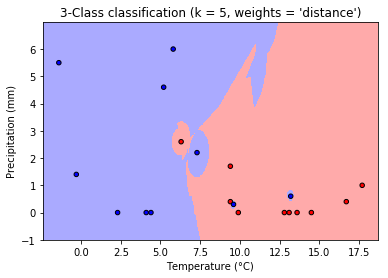

(array([[1.44222051, 1.61245155, 2.32594067, 2.6       , 2.96141858]]),
 array([[17,  9, 15, 12,  0]]))

In [13]:
weights = 'distance'

# We create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_data, X_target)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = temp.min() - 1, temp.max() + 1
y_min, y_max = precip.min() - 1, precip.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(temp, precip, c=X_target, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.show()
clf.kneighbors([[6.5,1]])

5) For each weight change the number of neighbours used. What do you think about it? What would be for you the optimal number? Do you think we have enough training points?

- The distance weight might over-constrain the data but it does effectively classify each of the training points. 

- 5 might in fact be the optimal number for neighbours

- Having more training points would always be good, using distance and 5 neighbours with these data points we can classify all the data however.

6) We now consider a new data set that corresponds to the mean temperatures (in °C) and the total precipitations (in mm) for some other days of May 2018 and May 2019 in Calgary. Using the function score, returns the mean accuracy on the given testing set for k=3. Try again for k=5. Plot the accuracy as a function of k. Does the choice of the weights make a difference? Comment the obtained results.

In [1]:
temp_test = np.array([9.9, 12.8, 15.4, 18.4, 19.9, 19, 9.3, 10.1, 9.9, 14.3,
                     12.2, 16.5, 12.4, 14.3, 12.8, 7, 5.1, 4.4, 6.7, 4.1])
# print(len(temp_ext))
precip_test = np.array([0.2, 0, 0, 0, 0, 0, 10.8, 1.8, 0, 0,
                       0, 0, 0.1, 0.4, 0.4, 1.6, 10, 2.8, 0, 0])
# print(len(precip_ext))
X_data_test = np.vstack((temp_test, precip_test)).T
X_target_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]).T

temp_test_2018 = temp_test[0:9].T
temp_test_2019 = temp_test[10:].T
precip_test_2018 = precip_test[0:9].T
precip_test_2019 = precip_test[10:].T


NameError: name 'np' is not defined

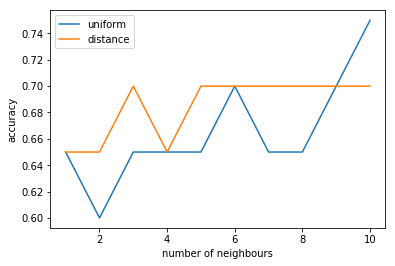

In [48]:
n = np.linspace(1, 10, 10)
h = 0.02  # step size in the mesh

uniform_scores = []
distance_scores = []

for weights in ['uniform', 'distance']:
    for n_neighbors in n:
        n_neighbors = int(n_neighbors)
        # We create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_data, X_target)

        score = clf.score(X_data_test, X_target)
#         print(weights)
#         print(score)
        if weights == 'uniform':
            uniform_scores.append(score)
        elif weights == 'distance':
            distance_scores.append(score)

plt.figure()
plt.plot(n, uniform_scores, label='uniform')
plt.plot(n, distance_scores, label='distance')
plt.legend()
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
plt.show()


The choice of weight changes the accuracy with distance being more accurate than uniform. The number of neighbours has little effect on the accuracy and the effect isn't monotonic

## Exercise 2: Nearest Neighbours for the Digit Dataset

In this exercise, we consider the digit dataset.  This dataset has 1797 samples. We will use 500 samples as the training dataset, 500 samples as the testing dataset and 797 samples as the unknown dataset.

1) We choose 50 neighbour. What is the accuracy of the classification? We will consider the different weights (uniform and distance).

In [8]:
digits = datasets.load_digits()

digits_data = digits.data
# print(len(digits_data))

n_neighbors = 50 # Nb of neighbours
h = 1  # step size in the mesh

training_data = digits_data[0:500, :]
training_target = digits.target[0:500,]

testing_data = digits_data[500:1000, :]
testing_target = digits.target[500:1000]

unknown_data = digits_data[1000:, :]
unknown_target = digits.target[1000:]

for weights in ['uniform', 'distance']:
# weights = 'uniform'

    # We create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(training_data, training_target)

    test_score = clf.score(testing_data, testing_target)
    unknown_score = clf.score(unknown_data, unknown_target)
    end = time.time()

    print(weights + " testing accuracy: " + str(test_score))
    print(weights + " unknown accuracy: " + str(unknown_score))

uniform testing accuracy: 0.804
uniform unknown accuracy: 0.8707653701380176
distance testing accuracy: 0.812
distance unknown accuracy: 0.8858218318695107


2) Compare the performance of the different algorithms: “ball_tree”, kd_tree”, “brute” for 50 and 150 neighbors (accuracy and time of execution). What do you think of the obtained results? To print the time of execution of a script, you can use the following code.

import time

start = time.time()

#Your code

end = time.time()

print(end - start)

In [9]:
for weights in ['uniform', 'distance']:
    for algorithm in ['ball_tree', 'kd_tree', 'brute']:
        start = time.time()
    
        if algorithm == 'brute':
            for n_neighbors in [50, 150]:
                # We create an instance of  Classifier and fit the data.
                clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm=algorithm, weights=weights)
                clf.fit(training_data, training_target)

                test_score = clf.score(testing_data, testing_target)
                unknown_score = clf.score(unknown_data, unknown_target)
                end = time.time()

                print(algorithm + ', k: ' + str(n_neighbors))
                print(weights + " testing accuracy: " + str(test_score))
                print(weights + " unknown accuracy: " + str(unknown_score))
                print('time taken: ' + str(end - start) + '\n')
        else:
            n_neighbors = 50

            # We create an instance of  Classifier and fit the data.
            clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm=algorithm, weights=weights)
            clf.fit(training_data, training_target)

            test_score = clf.score(testing_data, testing_target)
            unknown_score = clf.score(unknown_data, unknown_target)
            end = time.time()

            print(algorithm + ', k: ' + str(n_neighbors))
            print(weights + " testing accuracy: " + str(test_score))
            print(weights + " unknown accuracy: " + str(unknown_score))
            print('time taken: ' + str(end - start) + '\n')

ball_tree, k: 50
uniform testing accuracy: 0.802
uniform unknown accuracy: 0.8707653701380176
time taken: 0.09022903442382812

kd_tree, k: 50
uniform testing accuracy: 0.804
uniform unknown accuracy: 0.8707653701380176
time taken: 0.10505962371826172

brute, k: 50
uniform testing accuracy: 0.804
uniform unknown accuracy: 0.8707653701380176
time taken: 0.0453794002532959

brute, k: 150
uniform testing accuracy: 0.67
uniform unknown accuracy: 0.6612296110414053
time taken: 0.10556411743164062

ball_tree, k: 50
distance testing accuracy: 0.81
distance unknown accuracy: 0.8858218318695107
time taken: 0.06473422050476074

kd_tree, k: 50
distance testing accuracy: 0.812
distance unknown accuracy: 0.8858218318695107
time taken: 0.082672119140625

brute, k: 50
distance testing accuracy: 0.812
distance unknown accuracy: 0.8858218318695107
time taken: 0.02220940589904785

brute, k: 150
distance testing accuracy: 0.742
distance unknown accuracy: 0.795483061480552
time taken: 0.06315207481384277



3) We choose either k=50, k=100 or k=150. Which value of k seems to be the best? Test your classifier on the unknown dataset for each value of k. Comment

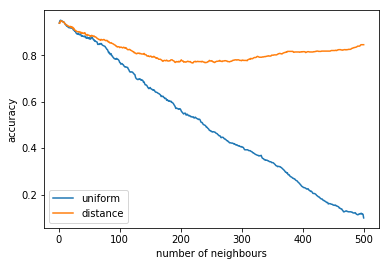

In [17]:
n = np.linspace(1, 500, 500)
h = 0.02  # step size in the mesh

uniform_scores = []
distance_scores = []

for weights in ['uniform', 'distance']:
    for n_neighbors in n:
        n_neighbors = int(n_neighbors)
        # We create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(training_data, training_target)

        score = clf.score(unknown_data, unknown_target)
#         print(weights)
#         print(score)
        if weights == 'uniform':
            uniform_scores.append(score)
        elif weights == 'distance':
            distance_scores.append(score)
            
plt.figure()
plt.plot(n, uniform_scores, label='uniform')
plt.plot(n, distance_scores, label='distance')
plt.legend()
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
plt.show()

In general the accuracy decreases as a function of number of neighbours and drops more aggressively with uniform weight.

4) Using your training set, plot the accuracy as a function of k. Comment

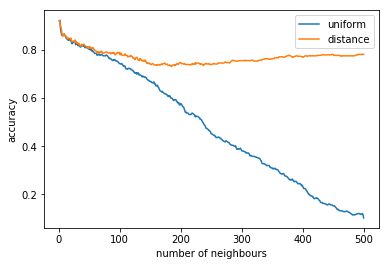

In [18]:
n = np.linspace(1, 500, 500)
h = 0.02  # step size in the mesh

uniform_scores = []
distance_scores = []

for weights in ['uniform', 'distance']:
    for n_neighbors in n:
        n_neighbors = int(n_neighbors)
        # We create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(training_data, training_target)

        score = clf.score(testing_data, testing_target)
#         print(weights)
#         print(score)
        if weights == 'uniform':
            uniform_scores.append(score)
        elif weights == 'distance':
            distance_scores.append(score)
            
plt.figure()
plt.plot(n, uniform_scores, label='uniform')
plt.plot(n, distance_scores, label='distance')
plt.legend()
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
plt.show()

Again, similar to the unknown data set, the accuracy decreases as a function of number of neighbours and drops more aggressively with uniform weight.

## Exercise 3: Nearest Neighbours for the Iris Dataset

In this exercise, we consider the iris dataset. This dataset has 150 samples. The first 50 samples correspond to setosa, the next 50 to versicolor and the last 50 to virginica.  We will use 50 samples as the training dataset, 50 samples as the testing dataset and 50 samples as the unknown dataset. Each sample of the dataset has four components. However, we will consider in this exercise that only the two first components are relevant.

1) Create the training dataset that contains at least 16 samples that correspond to setosa, 16 samples that correspond to versicolor and 16 samples that correspond to virginica. Create the testing and unknown datasets mixing the types of iris.

In [20]:
iris = datasets.load_iris()

In [21]:
# Defining the data

print(iris.target_names)
print(iris.feature_names)
iris_data = iris.data[:,:2]
iris_target = iris.target

#Training set
training_data = iris_data[0:150:3,:]
training_target = iris_target[0:150:3]

#We consider the next 50 points for the testing set
testing_data = iris_data[1:150:3,:]
testing_target = iris_target[1:150:3]


#We consider the next 50 points for the unknown set
unknown_data = iris_data[2:150:3,:]
unknown_target = iris_target[2:150:3]
h = .02  # step size in the mesh

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


2) For each type of weights, plot the decision domain using the given training set.

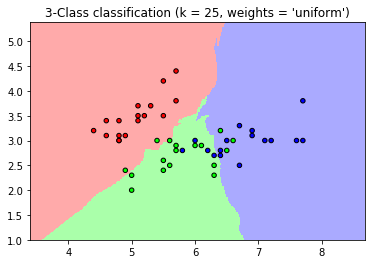

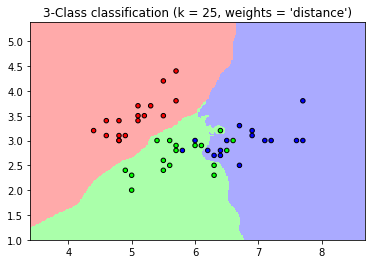

0.76

In [26]:
n_neighbors = 25 # Nb of neighbours
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors=25

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(training_data, training_target)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = training_data[:, 0].min() - 1, training_data[:, 0].max() + 1
    y_min, y_max = training_data[:, 1].min() - 1, training_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(training_data[:, 0], training_data[:, 1], c=training_target, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
clf.score(unknown_data, unknown_target)

3) Using you testing dataset and the “distance weights”, what is the best value for k? For this value of k, test your classifier against the unknown dataset. Now test it with k=10 and k=20. Comment.

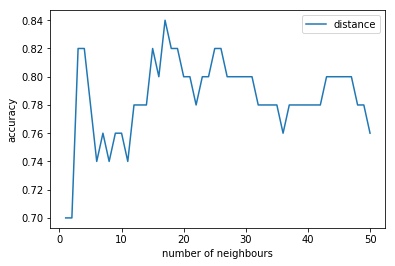

In [28]:
n = np.linspace(1, 50, 50)
h = 0.02  # step size in the mesh

uniform_scores = []
distance_scores = []

weights = 'distance'
for n_neighbors in n:
    n_neighbors = int(n_neighbors)
    # We create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(training_data, training_target)

    score = clf.score(testing_data, testing_target)
#         print(weights)
#         print(score)
    distance_scores.append(score)
            
plt.figure()
plt.plot(n, distance_scores, label='distance')
plt.legend()
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
plt.show()